# Spam detect small dataset

In [43]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [20]:
data = pd.read_csv('data/spambase/spambase.data').values
np.random.shuffle(data)
data.shape

(4600, 58)

In [15]:
X = data[:,:48]
Y = data[:, -1]

In [17]:
Xtrain =X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest= Y[-100:,]

### Utilise Multinomial Naive Bayes

In [18]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print(f'Classification rate for NB: {model.score(Xtest,Ytest)}')

Classification rate for NB: 0.79


### Utilise AdaBoostClassifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(Xtrain,Ytrain)
print(f'Classification rate for NB: {model.score(Xtest,Ytest)}')

Classification rate for NB: 0.87


# SPAM Detect Kaggle dataset

In [22]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

## Load Dataset

In [24]:
df = pd.read_csv('data/spam.csv',encoding='ISO-8859-1')
df=  df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"],axis=1)

df.columns = ['labels','data']

df['b_labels'] = df['labels'].map({'ham':0,'spam':1})

### Separate Dataset

In [34]:
Y=df['b_labels'].values

count_vectorizer = CountVectorizer(decode_error='ignore')
X=count_vectorizer.fit_transform(df['data'])

Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.33)

### Utilize Multinomial Naive Bayes

In [36]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print(f'train score: {model.score(Xtrain,Ytrain)}')
print(f'train score: {model.score(Xtest,Ytest)}')

train score: 0.994374497723011
train score: 0.9798803697661773


## Creating Word Cloud

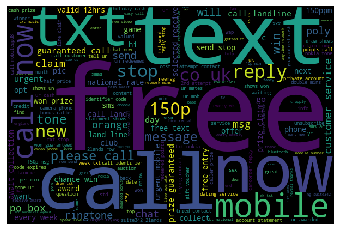

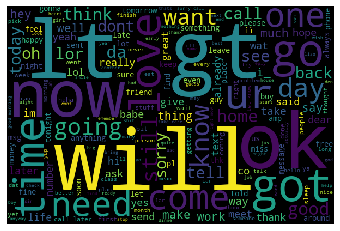

In [48]:
def visualize(label):
    words=''
    for msg in df[df['labels']==label]['data']:
        msg = msg.lower()
        words+=msg +' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
visualize('spam')
visualize('ham')

# Finding False Predictions

In [49]:
df['predictions'] = model.predict(X)

In [53]:
sneaky_spam = df[(df['predictions']==0)&(df['b_labels']==1)]['data']

In [54]:
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
Would you like to se

In [55]:
not_actually_spam = df[(df['predictions']==1)&(df['b_labels']==0)]['data']
for msg in not_actually_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
Hey company elama po mudyadhu.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D
S..antha num corrct dane
Audrie lousy autocorrect
Yavnt tried yet and never played original either
\Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtåÓbraindanceåÓa comp.ofstuff on aphexåÕs ;abel
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
Tiwary to rcb.battle between bang and kochi.
Mostly sports type..lyk footbl,crckt..
Cps is causing the outages to conserve energy.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderso